<h1 style=font-size:40px><center>Exploratory Data Analysis of Pokemon Data</center><h1>

<img src="Poke_Logo.png" style="width:600px;height:250px" />

<h4><p> This Notebook will be looking at a Pokemon Dataset in which will demonstrate a number of basic functions that can be used in exploratory analysis using Python and Pandas. This Notebook will show a number of topics such as how to import libraries, read data from different formats, cleaning, exploring and visualizing the Pokemon dataset. Libraries used: Pandas, Numpy, Matplotlib, Seaborn </p></h4>

<h2> Loading Data/Importing Libraries </h2>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('Pokemon.csv')

#Read Excel file into a Data frame
#df_xlsx = pd.read_excel('pokemon_data.xlsx')

<h2>Reading data using Pandas</h2>

In [9]:
#Print out the columns/headers
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [10]:
#Print the first five rows of the dataset
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
#Print the last five rows of the dataset
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [12]:
#Print each column using double square brackets
print(df[['Name' ,'Type 1', 'Legendary']])

                      Name   Type 1  Legendary
0                Bulbasaur    Grass      False
1                  Ivysaur    Grass      False
2                 Venusaur    Grass      False
3    VenusaurMega Venusaur    Grass      False
4               Charmander     Fire      False
..                     ...      ...        ...
795                Diancie     Rock       True
796    DiancieMega Diancie     Rock       True
797    HoopaHoopa Confined  Psychic       True
798     HoopaHoopa Unbound  Psychic       True
799              Volcanion     Fire       True

[800 rows x 3 columns]


In [16]:
#Use the iloc() method to select and print rows
#the below selection prints the first row in the dataset
print(df.iloc[0])

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object


In [178]:
#Loop that prints each index and Name of each row
#with the help of the iterrows() function
#for i,  row in df.iterrows():
#    print(i, row['Name'])

<h2>Describing/Sorting Data</h2>

In [19]:
#Print descriptive statistics using the describe() function
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [20]:
#Print information about the data using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [22]:
#Print the shape of the data using shape()
# (rows, columns)
df.shape

(800, 13)

In [101]:
df.dtypes

Pokedex No.     int64
Name           object
Type 1         object
Type 2         object
Total           int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
dtype: object

In [23]:
#Sort values by name using sort_values() function
df.sort_values('Name')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False
393,359,AbsolMega Absol,Dark,NaN,565,65,150,60,115,60,115,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,571,Zoroark,Dark,NaN,510,60,105,60,120,60,105,5,False
631,570,Zorua,Dark,NaN,330,40,65,40,80,40,65,5,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
695,634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False


In [25]:
#Sort values by Name (Descending)
df.sort_values('Name', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
695,634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
631,570,Zorua,Dark,NaN,330,40,65,40,80,40,65,5,False
632,571,Zoroark,Dark,NaN,510,60,105,60,120,60,105,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,359,AbsolMega Absol,Dark,NaN,565,65,150,60,115,60,115,3,False
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False


In [27]:
#Sort values by the Pokemon with highest Attack attribute
df.sort_values('Attack', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [29]:
#Sort values by the Pokemon that is the slowest (Speed)
df.sort_values('Speed')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False


In [33]:
#Sorting by multiple columns Defense and Sp. Def
#1= True 0 = False
df.sort_values(['Defense', 'Sp. Def'], ascending=[0,1])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
257,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [36]:
#Sorting by multiple columns Defense and Sp. Def
#1= True 0 = False
df.sort_values(['Defense', 'Sp. Def'], ascending=[0,0])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


<h2>Transforming Data/Cleaning</h2>

In [99]:
#renaming the hash column to Pokedex No.
df.rename(columns={'#':'Pokedex No.'}, inplace=True)

In [100]:
df.head()

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [143]:
#Part of Cleaning data is checking for null values, if not handled accordingly
#null values can have a bad effect on your data analysis
df.isnull().sum()

Pokedex No.      0
Name             0
Type 1           0
Type 2         386
Total            0
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

In [144]:
#using the .fillna() method we are going to fill the Null values
#with the String 'None' indicating that there is not a Type 2 for some Pokemon
df['Type 2'] = df['Type 2'].fillna('None')

In [145]:
#Check to see if the data has any Null values
df.isnull().sum()

Pokedex No.    0
Name           0
Type 1         0
Type 2         0
Total          0
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Generation     0
Legendary      0
dtype: int64

<h2>Saving Data (Exporting data into desired format)</h2>

In [39]:
#Save the dataset into a text file
df.to_csv('pokemon.txt', index=False, sep='\t')

#Save the dataset into a csv file
#df.to_csv('pokemon_new.csv', index=False)

#Save the dataset into a Excel file
#df.to_excel('pokemon_ex.xlsx', index=False )

<h2>Filtering</h2>

In [40]:
#Print all the Grass Pokemon (Type 1) 
df.loc[df['Type 1'] == 'Grass']

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,405,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False


In [48]:
#Print all the Pokemon that are Grass and Fighting in
#Type 1 and Type 2 respectively
df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Fighting')]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
310,286,Breloom,Grass,Fighting,460,60,130,80,60,60,70,3,False
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False


In [64]:
#Print all the Fighting Pokemon (Type 1) 
#with a Defense attribute greater than 80
df.loc[(df['Type 1'] == 'Fighting') & (df['Defense'] > 80)]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
256,237,Hitmontop,Fighting,NaN,455,50,95,95,35,110,70,2,False
336,308,MedichamMega Medicham,Fighting,Psychic,510,60,100,85,80,85,100,3,False
498,448,LucarioMega Lucario,Fighting,Steel,625,70,145,88,140,70,112,4,False
593,533,Gurdurr,Fighting,NaN,405,85,105,85,40,50,40,5,False
594,534,Conkeldurr,Fighting,NaN,505,105,140,95,55,65,45,5,False
598,538,Throh,Fighting,NaN,465,120,100,85,30,85,45,5,False


In [69]:
#Print all the Pokemon who have 
#attributes greater than 100 in Attack, Speed and Defense
df.loc[(df['Attack'] > 100) & (df['Defense'] > 100) & (df['Speed'] > 100)]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
693,632,Durant,Bug,Steel,484,58,109,112,48,48,109,5,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


In [70]:
#This filters in all the Pokemon that has the 
#'Mega' within their name
df.loc[df['Name'].str.contains('Mega')]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [73]:
#This filters out all the Pokemon 
#with 'Mega' in their name by using '~'
df.loc[~df['Name'].str.contains('Mega')]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [83]:
#Using regex and flags attributes, show
#Pokemon that are either Electric or Fire
#The 're.I' allows you to perform case-insensitive matching
df.loc[df['Type 1'].str.contains('electric|fire', flags=re.I, regex=True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False
764,694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
765,695,Heliolisk,Electric,Normal,481,62,55,52,109,94,109,6,False
772,702,Dedenne,Electric,Fairy,431,67,58,57,81,67,101,6,False


In [90]:
#Show Pokemon that have a 'Type 1' of either Bug or Dragon
df.loc[df['Type 1'].str.contains('Bug|Dragon', flags=re.I, regex=True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False
774,704,Goomy,Dragon,NaN,300,45,50,35,55,75,40,6,False
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False


In [94]:
#More filtering
#Shows Pokemon that have a 'Type 1' of either Bug or Dragon
#and have a 'Type 2' of either Fire or Water
df.loc[(df['Type 1'].str.contains('Bug|Dragon', flags=re.I, regex=True)) 
       & (df['Type 2'].str.contains('Fire|Water', flags=re.I, regex=True))]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
307,283,Surskit,Bug,Water,269,40,30,32,50,52,65,3,False
697,636,Larvesta,Bug,Fire,360,55,85,55,50,55,60,5,False
698,637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True


In [87]:
#Filter and show the Pokemon
#that starts the Name with 'pi'
df.loc[df['Name'].str.contains('^pi[a-z]*', flags=re.I, regex=True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
136,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
219,204,Pineco,Bug,NaN,290,50,65,90,35,35,15,2,False
239,221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False


In [102]:
#Filter and show the Pokemon
#that contains 'man' within the Name
df.loc[df['Name'].str.contains('man[a-z]*', flags=re.I, regex=True)]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
61,56,Mankey,Fighting,NaN,305,40,80,35,35,45,70,1,False
149,138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
338,310,Manectric,Electric,NaN,475,70,75,60,105,60,105,3,False
339,310,ManectricMega Manectric,Electric,NaN,575,70,75,80,135,80,135,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
615,555,DarmanitanStandard Mode,Fire,NaN,480,105,140,55,30,55,95,5,False
616,555,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False


In [109]:
#Loading in the data again so we can modify the values
#
mod_df = pd.read_csv('Pokemon.csv')

mod_df.rename(columns={'#':'Pokedex No.'}, inplace=True)

In [110]:
mod_df.head()

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [111]:
#The below code changes all Fire Pokemon (Type 1 = Fire) Legendary value to True
mod_df.loc[mod_df['Type 1']== 'Fire', 'Legendary'] = True


In [113]:
#This shows that all the Pokemon have a True value in the
#Legendaey columns
mod_df.loc[mod_df['Type 1'] == 'Fire']

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,True
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,True
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,True
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,True
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,True
63,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,True
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,True
83,77,Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,True


In [118]:
mod_df.loc[mod_df['Total'] > 600]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,True
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False


<h2>Aggregate Statistics (Group By)</h2>

In [119]:
#Groupby() function allows you to  group data by different categories, columns, 
#attributes or some other criteria  making it easier to analyze groups of data
df.groupby(['Type 1']).mean()

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [121]:
#This shows the mean value of of all the numeric attributes in the dataset
#For each Type 
df.groupby(['Type 1']).mean()

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [130]:
#Additionally the functions can be chained together with sort_values()
#to find the highest or lowest of each type
#Shows which type of Pokemon has the highest defense on average
df.groupby(['Type 1']).mean().sort_values(by='Defense', ascending=False)

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Steel,442.851852,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Ground,356.281250,437.500000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500
Water,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714
Ice,423.541667,433.458333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333
Grass,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000


In [132]:
#Shows which type of Pokemon is the fastest on average
df.groupby(['Type 1']).mean().sort_values('Speed', ascending=False)

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Normal,319.173469,401.683673,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020,0.020408
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Water,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714


In [133]:
#The below groupby shows the count of Type 1
df.groupby(['Type 1']).count()

,Pokedex No.,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


In [138]:
#The above count function shows a lot of unnecessary columns therefore going
#to clean up the count function by adding a column and using our modified dataframe
mod_df['count'] = 1
mod_df.groupby(['Type 1']).count()['count']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: count, dtype: int64

In [180]:
#Using the aggregate function that can take aggregate operations by string or
#functions
df.groupby(['Type 1']).aggregate(['min', np.median, max])

Pokedex No.             Total              HP             Attack  \
                 min median  max   min median  max min median  max    min   
Type 1                                                                      
Bug               10  291.0  666   194  395.0  600   1   60.0   86     10   
Dark             197  509.0  717   220  465.0  680  35   65.0  126     50   
Dragon           147  443.5  718   300  600.0  780  41   80.0  125     50   
Electric          25  403.5  702   205  477.5  610  20   60.0   90     30   
Fairy             35  669.0  716   218  405.0  680  35   78.0  126     20   
Fighting          56  308.0  701   210  455.0  625  30   70.0  144     35   
Fire               4  289.5  721   250  482.0  680  38   70.0  115     30   
Flying           641  677.5  715   245  557.5  580  40   79.0   85     30   
Ghost             92  487.0  711   275  464.5  680  20   59.5  150     30   
Grass              1  372.0  673   180  430.0  630  30   65.5  123     27   
Ground            27  363.5  645   265  440.0  770  10   75.0  115     40   
Ice              124  371.5  713   250  467.5  580  36   70.0  110     30   
Normal            16  296.5  676   190  415.0  720  30   70.0  255      5   
Poison            23  139.5  691   245  401.5  535  35   67.5  105     43   
Psychic           63  386.0  720   198  485.0  780  20   68.0  190     20   
Rock              74  362.5  719   280  467.5  700  30   68.5  123     40   
Steel            208  379.0  707   300  500.0  700  40   60.0  100     24   
Water              7  275.0  693   200  455.0  770  20   70.0  170     10   

          ... Sp. Def Speed             Generation            Legendary  \
          ...     max   min median  max        min median max       min   
Type 1    ...                                                             
Bug       ...     230     5   60.0  160          1    3.0   6     False   
Dark      ...     130    20   70.0  125          2    5.0   6     False   
Dragon    ...     150    40   90.0  120          1    4.0   6     False   
Electric  ...     110    35   88.0  140          1    4.0   6     False   
Fairy     ...     154    15   45.0   99          1    6.0   6     False   
Fighting  ...     110    25   60.0  118          1    3.0   6     False   
Fire      ...     154    20   78.5  126          1    3.0   6     False   
Flying    ...      90    55  116.0  123          5    5.5   6     False   
Ghost     ...     135    20   60.5  130          1    4.0   6     False   
Grass     ...     129    10   58.5  145          1    3.5   6     False   
Ground    ...     120    10   65.0  120          1    3.0   5     False   
Ice       ...     200    25   62.0  110          1    3.0   6     False   
Normal    ...     135     5   71.0  135          1    3.0   6     False   
Poison    ...     123    25   62.5  130          1    1.5   6     False   
Psychic   ...     160    20   80.0  180          1    3.0   6     False   
Rock      ...     150    10   50.0  150          1    3.0   6     False   
Steel     ...     150    23   50.0  110          2    3.0   6     False   
Water     ...     160    15   65.0  122          1    3.0   6     False   

                        
         median    max  
Type 1                  
Bug         0.0  False  
Dark        0.0   True  
Dragon      0.0   True  
Electric    0.0   True  
Fairy       0.0   True  
Fighting    0.0  False  
Fire        0.0   True  
Flying      0.5   True  
Ghost       0.0   True  
Grass       0.0   True  
Ground      0.0   True  
Ice         0.0   True  
Normal      0.0   True  
Poison      0.0  False  
Psychic     0.0   True  
Rock        0.0   True  
Steel       0.0   True  
Water       0.0   True  

[18 rows x 30 columns]

In [193]:
#Aggregate() function can also take in a dictionary
df.groupby(['Type 1']).aggregate({'Total': ['median', 'mean', 'count'],
                                 'HP': ['median', 'mean', 'count'],
                                 'Attack':['median', 'mean', 'count'],
                                  'Defense':['median', 'mean', 'count'],
                                  'Sp. Atk':['median', 'mean', 'count'],
                                  'Sp. Def':['median', 'mean', 'count'],
                                  'Speed':['median', 'mean', 'count']
                                 })

Total                       HP                  Attack              \
         median        mean count median       mean count median        mean   
Type 1                                                                         
Bug       395.0  378.927536    69   60.0  56.884058    69   65.0   70.971014   
Dark      465.0  445.741935    31   65.0  66.806452    31   88.0   88.387097   
Dragon    600.0  550.531250    32   80.0  83.312500    32  113.5  112.125000   
Electric  477.5  443.409091    44   60.0  59.795455    44   65.0   69.090909   
Fairy     405.0  413.176471    17   78.0  74.117647    17   52.0   61.529412   
Fighting  455.0  416.444444    27   70.0  69.851852    27  100.0   96.777778   
Fire      482.0  458.076923    52   70.0  69.903846    52   84.5   84.769231   
Flying    557.5  485.000000     4   79.0  70.750000     4   85.0   78.750000   
Ghost     464.5  439.562500    32   59.5  64.437500    32   66.0   73.781250   
Grass     430.0  421.142857    70   65.5  67.271429    70   70.0   73.214286   
Ground    440.0  437.500000    32   75.0  73.781250    32   85.0   95.750000   
Ice       467.5  433.458333    24   70.0  72.000000    24   67.0   72.750000   
Normal    415.0  401.683673    98   70.0  77.275510    98   70.5   73.469388   
Poison    401.5  399.142857    28   67.5  67.250000    28   74.0   74.678571   
Psychic   485.0  475.947368    57   68.0  70.631579    57   57.0   71.456140   
Rock      467.5  453.750000    44   68.5  65.363636    44   95.0   92.863636   
Steel     500.0  487.703704    27   60.0  65.222222    27   89.0   92.703704   
Water     455.0  430.455357   112   70.0  72.062500   112   72.0   74.151786   

               Defense  ...       Sp. Atk                  Sp. Def             \
         count  median  ... count  median       mean count  median       mean   
Type 1                  ...                                                     
Bug         69    60.0  ...    69    50.0  53.869565    69    60.0  64.797101   
Dark        31    70.0  ...    31    65.0  74.645161    31    65.0  69.516129   
Dragon      32    90.0  ...    32   105.0  96.843750    32    90.0  88.843750   
Electric    44    65.0  ...    44    95.0  90.022727    44    79.5  73.704545   
Fairy       17    66.0  ...    17    75.0  78.529412    17    79.0  84.705882   
Fighting    27    70.0  ...    27    40.0  53.111111    27    63.0  64.703704   
Fire        52    64.0  ...    52    85.0  88.980769    52    67.5  72.211538   
Flying       4    75.0  ...     4   103.5  94.250000     4    80.0  72.500000   
Ghost       32    72.5  ...    32    65.0  79.343750    32    75.0  76.468750   
Grass       70    66.0  ...    70    75.0  77.500000    70    66.0  70.428571   
Ground      32    84.5  ...    32    47.5  56.468750    32    62.5  62.750000   
Ice         24    75.0  ...    24    77.5  77.541667    24    70.0  76.291667   
Normal      98    60.0  ...    98    50.0  55.816327    98    60.5  63.724490   
Poison      28    67.0  ...    28    60.0  60.428571    28    60.5  64.392857   
Psychic     57    65.0  ...    57    95.0  98.403509    57    90.0  86.280702   
Rock        44   100.0  ...    44    60.0  63.340909    44    70.0  75.477273   
Steel       27   120.0  ...    27    55.0  67.518519    27    80.0  80.629630   
Water      112    70.0  ...   112    70.0  74.812500   112    65.0  70.517857   

                Speed                    
         count median        mean count  
Type 1                                   
Bug         69   60.0   61.681159    69  
Dark        31   70.0   76.161290    31  
Dragon      32   90.0   83.031250    32  
Electric    44   88.0   84.500000    44  
Fairy       17   45.0   48.588235    17  
Fighting    27   60.0   66.074074    27  
Fire        52   78.5   74.442308    52  
Flying       4  116.0  102.500000     4  
Ghost       32   60.5   64.343750    32  
Grass       70   58.5   61.928571    70  
Ground      32   65.0   63.906250    32  
Ice         24   62.0   63.458333    24

In [212]:
#Displays the mean of our dataset grouped by Type 1
df.groupby(['Type 1']).mean()

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [223]:
#function is true if average attack attribute is greater than 95
def filter_strong(x):
    return x['Attack'].mean() > 95

In [224]:
#Applying the filter_strong function using filter()
#This now shows the Type 1 that has an average greater than 95
df.groupby(['Type 1']).filter(filter_strong)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
32,27,Sandshrew,Ground,None,300,50,75,85,20,30,40,1,False
33,28,Sandslash,Ground,None,450,75,100,110,45,55,65,1,False
55,50,Diglett,Ground,None,265,10,55,25,35,45,95,1,False
56,51,Dugtrio,Ground,None,405,35,80,50,50,70,120,1,False
61,56,Mankey,Fighting,None,305,40,80,35,35,45,70,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False
774,704,Goomy,Dragon,None,300,45,50,35,55,75,40,6,False
775,705,Sliggoo,Dragon,None,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False


<h2>Working with large amounts of data</h2>

In [142]:
#The code below demonstrates a way to read in a large dataset in which we 
#read in sizeable chunks defined by the chunksize attribute
new_df = pd.DataFrame(columns=df.columns)

for df1 in pd.read_csv('Pokemon.csv', chunksize=5):
    results = df1.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])
    


<h2>Data Visualizations</h2>

In [146]:
#Back to using the original data frame
#Check the correlation in the dataset using the corr() function
df.corr(method='pearson')

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Pokedex No.,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [148]:
#We are going to check the correlation only for the Battle attributes
df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


In [149]:
#We can use min() to find the weakest correlation between variables
df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr().min()

Total      0.575943
HP         0.175952
Attack     0.263990
Defense    0.015227
Sp. Atk    0.223549
Sp. Def    0.259133
Speed      0.015227
dtype: float64

From the correlation table we can see that there is a range of different types of correlation of different strengths, the two attributes with the weakest correlation between each other is 'Speed' and 'Defense' whilst the attribtutes with the strongest correlation was between 'Total' and 'Sp. Atk' attributes.

<h3>Correlation</h3>

Text(0.5, 1.0, 'Correlation between Sp. Atk and Speed')

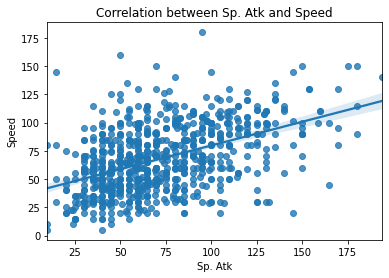

In [154]:
sns.regplot(data=df, x='Sp. Atk', y='Speed')
plt.title('Correlation between Sp. Atk and Speed')

In [156]:
df[['Sp. Atk', 'Speed']].corr()

,Sp. Atk,Speed
Sp. Atk,1.000000,0.473018
Speed,0.473018,1.000000


Generally as the Sp. Atk goes up so does the Speed, however theres a lot of observations in which are not as close to the regression line. The regression line shows a positive moderate relationship between the variables. The correlation statistic between Sp. Atk and Speed is 0.47 as it is non-negative this value indicates a positive association between the two variables.

Text(0.5, 1.0, 'Correlation between Speed and Defense')

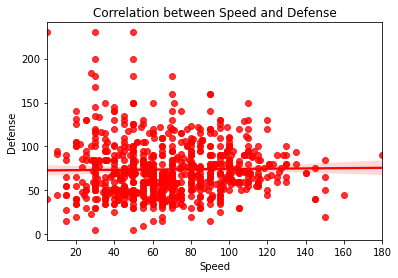

In [159]:
sns.regplot(data=df, x='Speed', y='Defense', color='red')
plt.title('Correlation between Speed and Defense')

In [158]:
df[['Speed', 'Defense']].corr()

,Speed,Defense
Speed,1.000000,0.015227
Defense,0.015227,1.000000


Looking at the above plot you can see that there is a weak relationship between the Speed and Defense as the regression line is fairly horizontal. In addition the correlation matrix shows that correlation statistic is 0.01 which also suggests there is a weak/no relationship between the two variables.

Text(0.5, 1.0, 'Correlation between Sp. Atk and Sp. Def')

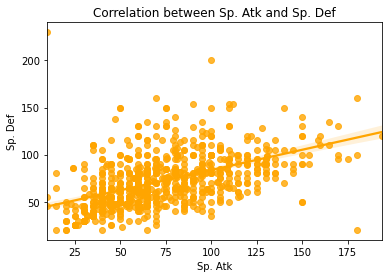

In [167]:
sns.regplot(data=df, x='Sp. Atk', y='Sp. Def', color='orange')
plt.title('Correlation between Sp. Atk and Sp. Def')

In [160]:
df[['Sp. Atk', 'Sp. Def']].corr()

,Sp. Atk,Sp. Def
Sp. Atk,1.000000,0.506121
Sp. Def,0.506121,1.000000


From the above plot you can see there is a positve relationship, as the Sp. Atk increases so does the Sp. Def increase, the correlation matrix supports this by showing with the value 0.5.

<h2>Distribution Plots</h2>

In [169]:
#Putting the variables in a list grouped by the type of variable it is
num_variables = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
categ_variables = ['Type 1', 'Type 2', 'Generation', 'Legendary']
id_variables = ['Pokedex No.', 'Name']

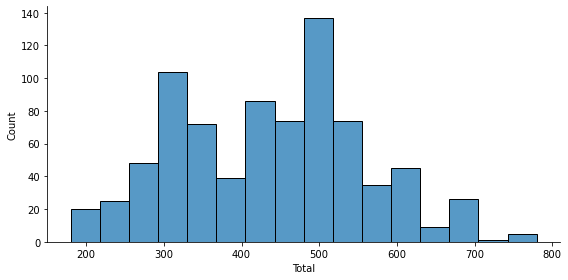

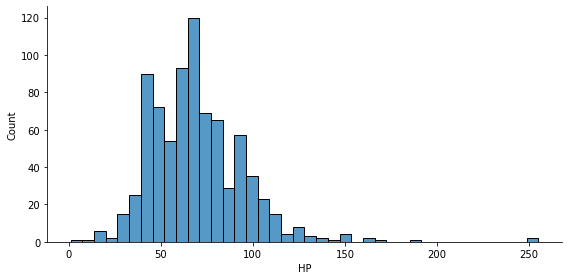

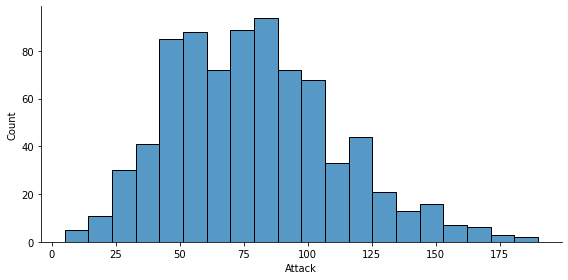

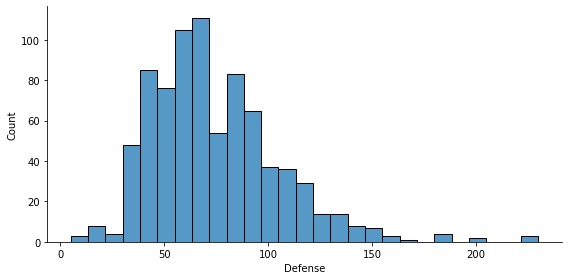

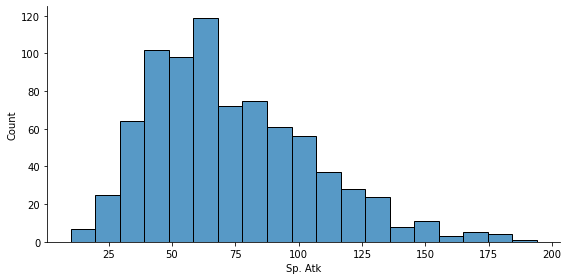

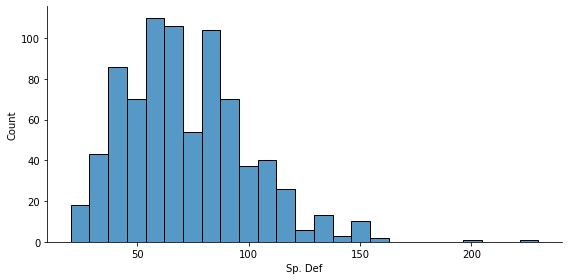

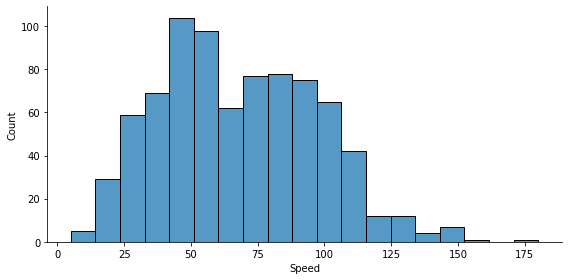

In [172]:
#The following plots shows the distribution of each numeric variable
for feature in num_variables:
    sns.displot(data=df, x=feature, height=4, aspect=2)

<b>Observations of Numeric Variables:</b>
<ul>
    <li>Total: This distirbution looks very much normal with a slight right skew, outliers are not strong </li>
    <li>HP: Has a right skew in this distribution with an outlier on the right</li>
    <li>Attack: This distribution has a fairly right skew but is one of the most symmetrical distributions, in addition it has not got many outliers</li>
    <li>Defense: This distribution has a right skew with many outliers on the right</li>
    <li>Sp. Atk: Tis distribution follows the theme of the other variables with right skew with not much of an outlier</li>
    <li>Sp. Def: This distribution is positively skewed to the right, one of the more pronounced skews out of the variables, again this distribution contains some outliers.</li>
    <li>Speed: This distribution very much looks normal with a very small outlier to the right</li>
</ul

<h2>Bar Plots</h2>

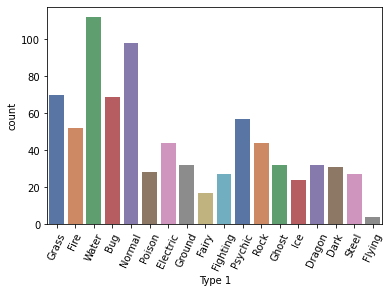

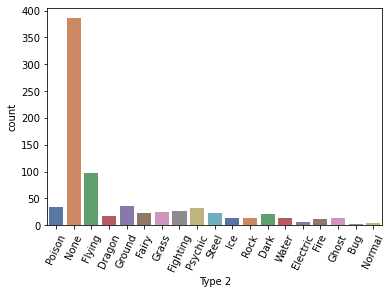

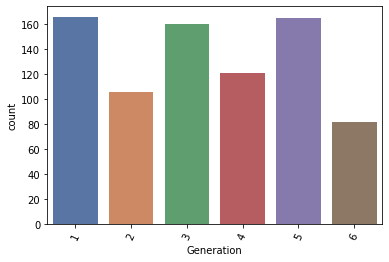

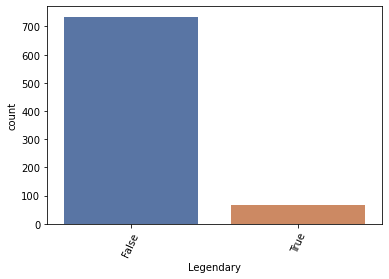

In [177]:
for feature in categ_variables:
    sns.countplot(data=df, x=feature, palette='deep')
    plt.xticks(rotation=65)
    plt.show()

<b>Observations of Categorical variables</b>
<ul>
    <li>Type 1: Water is the most common type of Pokemon, whereas Flying is the least common type in 'Type 1'</li>
    <li>Type 2: We can see that there is more Pokemon without a 'Type 2' by looking at the None variable, Bug type occurs the least in 'Type 2'</li>
    <li>Generation: The 1st, 3rd and 5th generation has the most Pokemon, the 6th generation has the least Pokemon, there seems to be a pattern</li>
    <li>Legendary: The amount of Pokemon that are not Legendary is more than double the amount that are Legendary </li>
</ul>

<h4>Who is the Strongest (Attack) Pokemon in the dataset?</h4>

In [239]:
#Can also be written using idxmax() however will return the first occurence if 
#more than one Pokemon has the max
#df.loc[df['Attack'].idxmax()]
df.loc[df['Attack'] == df['Attack'].max()]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


<h4>Who is the strongest (Attack) Pokemon in the dataset (Non-Legendary)?</h4>

In [272]:
df.loc[(df['Legendary'] == False)].sort_values('Attack', ascending=False).head(1)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False


<h4>Who is the weakest (Attack) Pokemon in the dataset?</h4>

In [240]:
df.loc[df['Attack'] == df['Attack'].min()]

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,None,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,None,220,100,5,5,15,65,30,4,False


<h4>Who is the Top 5 Strongest Bug Type Pokemon in the dataset?</h4>

In [245]:
df.loc[df['Type 1']=='Bug'].sort_values('Attack', ascending=False).head(5)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
229,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
650,589,Escavalier,Bug,Steel,495,70,135,105,60,105,20,5,False


<h4>Who is the Top 5 Strongest Bug Type Pokemon in the dataset (Not Megas)?</h4>

In [249]:
df.loc[(df['Type 1'] == 'Bug') & (-df['Name'].str.contains('Mega'))].sort_values('Attack', ascending=False).head(5)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
650,589,Escavalier,Bug,Steel,495,70,135,105,60,105,20,5,False
228,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False
136,127,Pinsir,Bug,None,500,65,125,100,55,70,85,1,False
231,214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False
717,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False


<h4>Who are the Top 5 Fastest (Speed) Pokemon from the 1st Generation(Not Megas)?</h4>

In [281]:
df.loc[df['Generation'] ==1 & (-df['Name'].str.contains('Mega'))].sort_values('Speed', ascending=False).head(5)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
109,101,Electrode,Electric,None,480,60,50,70,80,80,140,1,False
153,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
146,135,Jolteon,Electric,None,525,65,65,60,110,95,130,1,False
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True
70,65,Alakazam,Psychic,None,500,55,50,45,135,95,120,1,False


<h4>Who are the Top 5 Pokemon with the highest HP not from Generation 2 (Non-Legendary)?</h4>

In [288]:
df.loc[(df['Generation'] != 2) & (df['Legendary'] == False)].sort_values('HP', ascending=False).head(5)

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,None,450,250,5,5,35,105,50,1,False
351,321,Wailord,Water,None,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,None,470,165,75,80,40,45,65,5,False
155,143,Snorlax,Normal,None,540,160,110,65,65,110,30,1,False
473,426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
